In [1]:
import sys
sys.path.append("..")

In [5]:
import matplotlib.pyplot as plt

def plot_spectrogram(spectrogram, title=None):
    # Assuming 'spectrogram' is a torch tensor representing the spectrogram
    # Convert the tensor to a numpy array
    # spectrogram = spectrogram.detach().cpu().numpy()

    # spectrogram = spectrogram[0, 0, :, :]

    # Display the spectrogram using matplotlib
    plt.imshow(spectrogram, cmap='hot', origin='lower')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()

    if title:
        plt.title(title)

    plt.show()

TypeError: Image data of dtype object cannot be converted to float

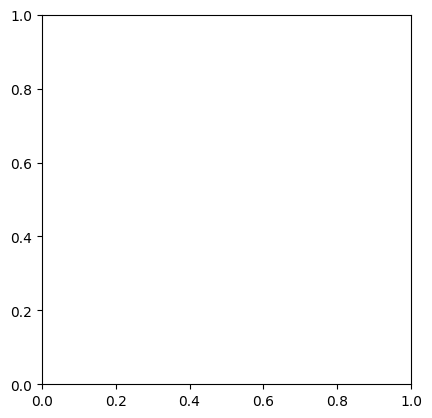

In [6]:
import torch
import models
import config

num_workers = torch.cuda.device_count()

vae = models.VAE()
netG = models.Generator(num_workers, channel_multiplier=3)

vae = vae.to(config.DEVICE)
netG = netG.to(config.DEVICE)

with torch.no_grad():
    fake = netG(config.FIXED_NOISE)

    # pass the fake spectrogram through the VAE decoder
    fake_spectrogram = vae.decode(fake)

tensor([[[[-7.0058, -6.5636, -6.6281,  ..., -6.7181, -6.9813, -7.1702],
          [-6.5707, -5.6802, -5.6239,  ..., -6.0149, -5.8802, -6.1223],
          [-6.1478, -5.2718, -5.0097,  ..., -5.4354, -5.3781, -5.6893],
          ...,
          [-7.6339, -7.1887, -6.6430,  ..., -6.0076, -5.9390, -7.0289],
          [-7.2608, -6.8596, -6.5354,  ..., -6.2992, -6.1255, -6.8448],
          [-6.6164, -6.5145, -6.0921,  ..., -5.2561, -5.6055, -5.3640]]]],
       device='cuda:0')


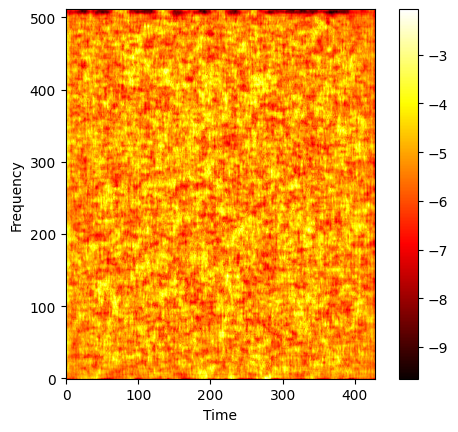

: 

In [11]:
print(fake_spectrogram.sample)
plot_spectrogram(fake_spectrogram.sample.cpu()[0, 0, :, :])